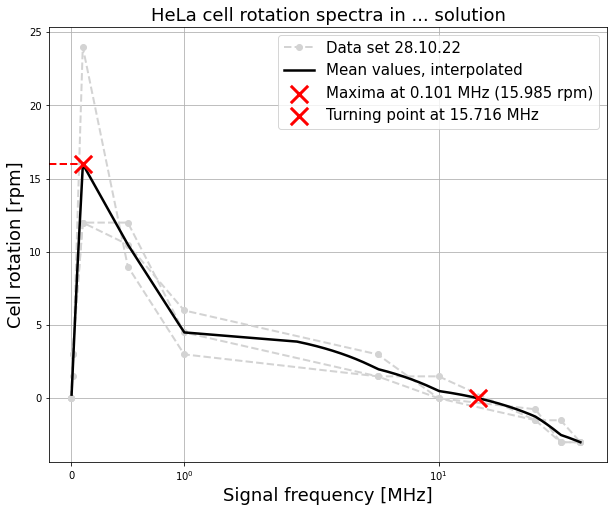

In [65]:
### Author: Lasse Totland 31.10.22

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

### Rotation of HeLa cells, manual recording of rotational frequency
### Solution: 

# Frequency range of signal
freq = np.array([0, 0.01, 0.1, 0.5, 1, 5, 10, 30, 40, 50]) #MHz

### Electrorotation Matrix
# Each row (= len(freq)) contains measurements from one cell
# Repeats per 10 sec, multiplied with 6 gives units RPM
# Positive: clockwise, negative: anti-clockwise
# Crude, manual measurement from video-clips (mostly closest fourth)

ERM = 6*np.array([[0, 0.5, 2, 2, 0.75, 0.25, 0.25, -0.25, -0.5, -0.5], #28/10/22
               [0, 0.5, 2, 1.75, 1, 0.5, 0, -0.25, -0.25, -0.5], #28/10/22
               [0, 0.25, 4, 1.5, 0.5, 0.25, 0, -0.125, -0.5, -0.5]]) #28/10/22

# Mean values and std across all columns (frequencies)
ERM_m = np.zeros(len(freq))
ERM_std = np.zeros(len(freq))

for i in list(range(len(freq))):
    ERM_m[i] = np.mean(ERM[:,i])
    ERM_std[i] = np.std(ERM[:,i]) #implement when actual data
    
### Plotting approximation with original data

fig = plt.figure(figsize = (10, 8))
plt.title('HeLa cell rotation spectra in ... solution', fontsize = 18)
plt.xlabel('Signal frequency [MHz]', fontsize = 18)
plt.ylabel('Cell rotation [rpm]', fontsize = 18)
plt.xscale('symlog')

for i in list(range(len(ERM))):
    plt.plot(freq, ERM[i,:], 'lightgrey', linestyle = '--', marker = 'o', lw = 2, 
             label = 'Data set 28.10.22' if i == 0 else '') # Ignore repeat labels
#plt.axhline(0, linestyle = '--', color = 'gray', lw = 2)

# Interpolate curve to find turning point
y = interp1d(freq, ERM_m)
x = np.linspace(0.001, 50, 1000)
plt.plot(x, y(x), '-k', lw = 2.5, label = 'Mean values, interpolated')

# Plotting maxima, turning point 
ymax_ = np.max(y(x))
ymax_i = np.argmax(y(x))
xmax_ = x[ymax_i]
plt.scatter(xmax_, ymax_, marker ='x', color = 'r', zorder = 2, lw = 3,
            s = 300, label = f'Maxima at {round(xmax_, 3)} MHz ({round(ymax_, 3)} rpm)')

#plt.yticks([ymax_], [f'{round(ymax_, 3)}'], color = 'r')
plt.hlines(ymax_, -0.2, xmax_, color = 'r', linestyle = '--', lw = 2)

yturn_i = np.argmin(abs(y(x))) #abs value closest to zero
xturn = x[yturn_i]
plt.scatter(xturn, 0, marker ='x', color = 'r', zorder = 2, lw = 3,
            s = 300, label = f'Turning point at {round(xturn, 3)} MHz')
#plt.hlines(0, -0.2, xturn, color = 'r', linestyle = '--', lw = 2)


plt.xlim(xmin = -0.2)
plt.grid(1); plt.legend(prop={'size': 15}); plt.show()